In [58]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
to_run = True
if to_run:
    os.chdir('..')
    to_run = False
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\
c:\


Viewing Hierarchical DCR


digraph {
	graph [bgcolor=white compound=true pad=0.5 rankdir=LR]
	node [shape=Mrecord]
	edge [arrowsize=0.5 labeldistance=0.0]
	proxyG [label="" height=0.0 shape=point style=invis width=0.0]
	A [label="{  |   } | { A }" font_size=12 style=solid]
	subgraph cluster_N3 {
		label=N3
		proxy_N3 [label="" height=0.0 shape=point style=invis width=0.0]
		F [label="{  |   } | { F }" font_size=12 style=solid]
		E [label="{  |   } | { E }" font_size=12 style=solid]
	}
	subgraph cluster_N1 {
		label=N1
		proxy_N1 [label="" height=0.0 shape=point style=invis width=0.0]
		subgraph cluster_N2 {
			label=N2
			proxy_N2 [label="" height=0.0 shape=point style=invis width=0.0]
			D [label="{  |  ! } | { D }" font_size=12 style=solid]
			C [label="{  |   } | { C }" font_size=12 style=solid]
		}
		B [label="{  |   } | { B }" font_size=12 style=dashed]
	}
	A -> proxy_N1 [arrowhead=dotnormal color="#FFA500" lhead=cluster_N1]
	proxy_N1 -> proxy_N3 [arrowhead=dotnormal color="#FFA500" lhead=cluster_N3 ltail=

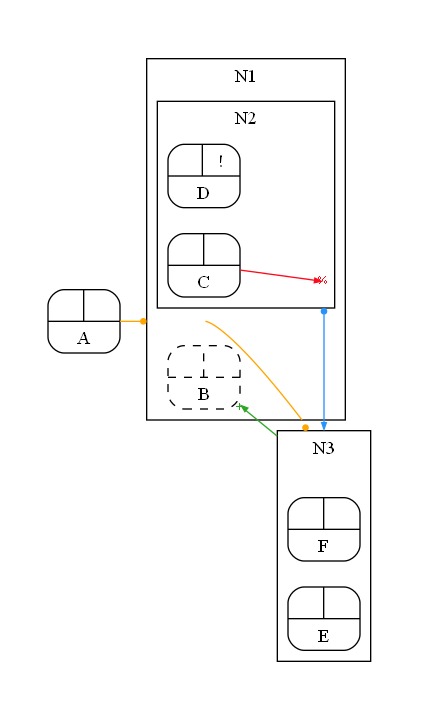

In [59]:
import pandas as pd
import pm4py
from ViewHierarchicalDcrGraph import View_HierarchicalDcr
from pm4py.objects.dcr.hierarchical.obj import HierarchicalDcrGraph
graph = HierarchicalDcrGraph()




events = [
    "A", "B", "C", "D", "E", "F"
]

groups = [    
    "N1", "N2", "N3"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event
    graph.marking.included.add(event)


for event in groups:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event
    #graph.nestedgroups_map[event] = event

graph.nestedgroups["N1"] =  {"B", "N2"} 
graph.nestedgroups["N2"] =  {"C", "D"} 
graph.nestedgroups["N3"] =  {"E", "F"} 

for group, events in graph.nestedgroups.items():
    for e in events:
        graph.nestedgroups_map[e] = group

graph.marking.included.remove("B")
graph.marking.pending.add("D")


graph.conditions["N1"] = {"A"}
graph.conditions["N3"] = {"N1"}

graph.responses["N2"] = {"N3"}

graph.includes["N3"] = {"B"}

graph.excludes["C"] = {"N2"}




View_HierarchicalDcr(graph)

